# **Trabajo final en Python: Análisis de un dataset**

___

## 1. Lectura y exploración inicial del dataset:

    a)Importen las librerías numpy y pandas

In [49]:
import numpy as np
import pandas as pd

    b)Lean el dataset descargado de Kaggle utilizando pandas.

In [50]:
archivo = 'Auto_Sales_data.csv'
data = pd.read_csv(archivo)  # Utiliza pd.read_csv() para cargar los datos desde un archivo CSV

    c)Muestren las primeras y últimas filas del dataset.

In [51]:
primeras = data.head()
ultimas = data.tail()

# Imprime las primeras y las últimas filas
print(f"Primeras filas: {primeras}")
print(f"Últimas 5 filas: {ultimas}")

Primeras filas:    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  24/02/2018                   828  Shipped  Motorcycles    95    S10_1678   
1  07/05/2018                   757  Shipped  Motorcycles    95    S10_1678   
2  01/07/2018                   703  Shipped  Motorcycles    95    S10_1678   
3  25/08/2018                   649  Shipped  Motorcycles    95    S10_1678   
4  28/10/2018                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  \


    d)Obtengan información general del dataset, como el número de filas y columnas, y los tipos de datos

In [52]:
info = data.info()   # Muestra info del csv

nfilas, ncolumnas = data.shape
print(f"Número de filas: {nfilas}")
print(f"Número de columnas: {ncolumnas}")

tipos = data.dtypes
print(f"Tipos de datos de cada columna:{tipos}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

___

## 2. Limpieza y preprocesamiento de datos:

    a)Identifiquen y traten o imputen los valores faltantes NaN usando una función personalizada que use la moda/media para remplazarlos. En caso de no haber filas con NaN, todo dato que esté por encima o por debajo de dos desviaciones típicas de la media tendrá que imputarse por la moda/media.

In [53]:
import pandas as pd
import numpy as np

archivo = 'Auto_Sales_data.csv'
df = pd.read_csv(archivo)  # Utiliza pd.read_csv() para cargar los datos desde un archivo CSV

# Función para reemplazar NaN con la moda o la media
def replace_nan(df, column, method='mean'):
    if df[column].isnull().sum() > 0:
        if method == 'mean':
            df[column].fillna(df[column].mean(), inplace=True)
        elif method == 'mode':
            df[column].fillna(df[column].mode()[0], inplace=True)

# Aplicar la función a todas las columnas
for column in df.columns:
    replace_nan(df, column)

# Tratar valores fuera de 2 desviaciones estándar
for column in df.select_dtypes(include=[np.number]).columns:
    mean = df[column].mean()
    std = df[column].std()
    upper_bound = mean + 2*std
    lower_bound = mean - 2*std
    df[column] = np.where((df[column] > upper_bound) | (df[column] < lower_bound), df[column].mean(), df[column])
    
print(df)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0         10107.0             30.0      95.70         2.000000  2871.00   
1         10121.0             34.0      81.35         5.000000  2765.90   
2         10134.0             41.0      94.74         2.000000  3884.34   
3         10145.0             45.0      83.26         6.000000  3746.70   
4         10168.0             36.0      96.66         1.000000  3479.76   
...           ...              ...        ...              ...      ...   
2742      10350.0             20.0     112.22         6.491081  2244.40   
2743      10373.0             29.0     137.19         1.000000  3978.51   
2744      10386.0             43.0     125.99         4.000000  5417.57   
2745      10397.0             34.0      62.24         1.000000  2116.16   
2746      10414.0             47.0      65.52         9.000000  3079.44   

       ORDERDATE  DAYS_SINCE_LASTORDER    STATUS  PRODUCTLINE  MSRP  \
0     24/02/2018            

    b) Conviertan los tipos de datos de las columnas si es necesario.

    c)Renombren las columnas para facilitar su manipulación.

In [71]:
df.columns = ['numero_del_pedido', 'cantidad_de_pedidos','precio_cada_pedido','numero_linea_pedido','ventas','fecha_pedido','dias_desde_ultimo_pedido','status','linea_producto','precio_venta_sugerido','codigo_producto','nombre_cliente','telefono','direccion_linea1','ciudad','codigo_postal','pais','apellido_contacto','nombre_contacto','tamaño_acuerdo']
print(df.columns)

Index(['numero_del_pedido', 'cantidad_de_pedidos', 'precio_cada_pedido',
       'numero_linea_pedido', 'ventas', 'fecha_pedido',
       'dias_desde_ultimo_pedido', 'status', 'linea_producto',
       'precio_venta_sugerido', 'codigo_producto', 'nombre_cliente',
       'telefono', 'direccion_linea1', 'ciudad', 'codigo_postal', 'pais',
       'apellido_contacto', 'nombre_contacto', 'tamaño_acuerdo'],
      dtype='object')


___

## 3. Análisis exploratorio de datos (EDA):

    a) Calculen estadísticas básicas de las columnas numéricas media, mediana, desviación estándar usando funciones personalizadas que tendréis que crear vosotros

Mirar que columnas tienen datos numéricos y hacer los calculos solo para las columnas donde es útil y tiene sentido

In [55]:
print(df.select_dtypes(include=[np.number]).columns)

Index(['numero_del_pedido', 'cantidad_de_pedidos', 'precio_cada_pedido',
       'numero_linea_pedido', 'ventas', 'dias_desde_ultimo_pedido',
       'precio_venta_sugerido'],
      dtype='object')


Crear una función para calcular la media

In [56]:
def media(columna):
    suma = 0
    for i in columna:
        suma += i
    return suma / len(columna)

Crear una función para calcular la mediana

In [57]:
def mediana(columna):
    columna_ordenada = sorted(columna)
    if len(columna) % 2 == 0:
        mediana = (columna_ordenada[int(len(columna) / 2)] + columna_ordenada[int(len(columna) / 2) - 1]) / 2
    else:
        mediana = columna_ordenada[int(len(columna) / 2)]
    return mediana

Crear una función para calcular la desviación estándar

In [58]:
def desviacion_estandar(columna):
    suma = 0
    for i in columna:
        suma += (i - media(columna))**2
    return (suma / len(columna))**0.5

Calcular la media, mediana y desviación estandar de la columna cantidad_de_pedidos

In [59]:
print(f"Media de cantidad de pedidos: {media(df['cantidad_de_pedidos'])}")
print(f"Mediana de cantidad de pedidos: {mediana(df['cantidad_de_pedidos'])}")
print(f"Desviación estándar de cantidad de pedidos: {desviacion_estandar(df['cantidad_de_pedidos'])}")

Media de cantidad de pedidos: 34.74265681368785
Mediana de cantidad de pedidos: 35.0


Desviación estándar de cantidad de pedidos: 8.875667188340268


Calcular la media, mediana y desviación estandar de la columna precio_cada_pedido

In [60]:
print(f"Media de precio cada pedido: {media(df['precio_cada_pedido'])}")
print(f"Mediana de precio cada pedido: {mediana(df['precio_cada_pedido'])}")
print(f"Desviación estándar de precio cada pedido: {desviacion_estandar(df['precio_cada_pedido'])}")

Media de precio cada pedido: 96.93071271184574
Mediana de precio cada pedido: 95.55
Desviación estándar de precio cada pedido: 35.903121229616374


Calcular la media, mediana y desviación estandar de la columna ventas

In [61]:
print(f"Media de ventas: {media(df['ventas'])}")
print(f"Mediana de ventas: {mediana(df['ventas'])}")
print(f"Desviación estándar de ventas: {desviacion_estandar(df['ventas'])}")

Media de ventas: 3330.1157135434123
Mediana de ventas: 3184.8
Desviación estándar de ventas: 1462.6659540727312


Calcular la media, mediana y desviación estandar de la columna precio_venta_sugerido

In [62]:
print(f"Media de precio venta sugerido: {media(df['precio_venta_sugerido'])}")
print(f"Mediana de precio venta sugerido: {mediana(df['precio_venta_sugerido'])}")
print(f"Desviación estándar de precio venta sugerido: {desviacion_estandar(df['precio_venta_sugerido'])}")

Media de precio venta sugerido: 96.99132375802888
Mediana de precio venta sugerido: 99.0
Desviación estándar de precio venta sugerido: 34.87009347177173


Teniendo en cuenta que hay distintos tipos de productos que se venden y no todos son muy parecidos en demanda y precio tiene sentido calcular los estadísticos de cada producto por separado.
Para esto se puede crear una función que reciba como parámetro el nombre del producto y la columna y calcule los estadísticos.

In [63]:
def estadisticos_producto(producto, columna):
    print(f"Media de {producto}: {media(df[df['linea_producto'] == producto][columna])}")
    print(f"Mediana de {producto}: {mediana(df[df['linea_producto'] == producto][columna])}")
    print(f"Desviación estándar de {producto}: {desviacion_estandar(df[df['linea_producto'] == producto][columna])}")

Mirar que productos aparecen en linea_producto

In [64]:
print(df['linea_producto'].unique())

['Motorcycles' 'Classic Cars' 'Trucks and Buses' 'Vintage Cars' 'Planes'
 'Ships' 'Trains']


Ejemplo: Calcular los estadísticos para coches motos y trenes en precio_cada_pedido

In [65]:
#mirar cuantas veces aparece la palabra 
print(df['linea_producto'].value_counts())
#mirar cuanto suma el precio de todos los 304 planes
print(df[df['linea_producto'] == 'Planes']['precio_venta_sugerido'].sum())


linea_producto
Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: count, dtype: int64
27046.0


In [66]:
estadisticos_producto('Motorcycles', 'precio_cada_pedido')
estadisticos_producto('Classic Cars', 'precio_cada_pedido')

Media de Motorcycles: 94.55167499601654
Mediana de Motorcycles: 93.54
Desviación estándar de Motorcycles: 35.15903528339621
Media de Classic Cars: 108.01172175949765
Mediana de Classic Cars: 105.27
Desviación estándar de Classic Cars: 39.27248615076215


    b) Crear gráficos para visualizar la distribución de los datos, como histogramas y diagramas de caja.

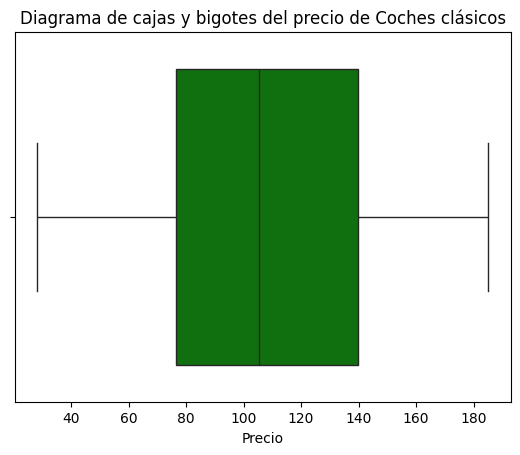

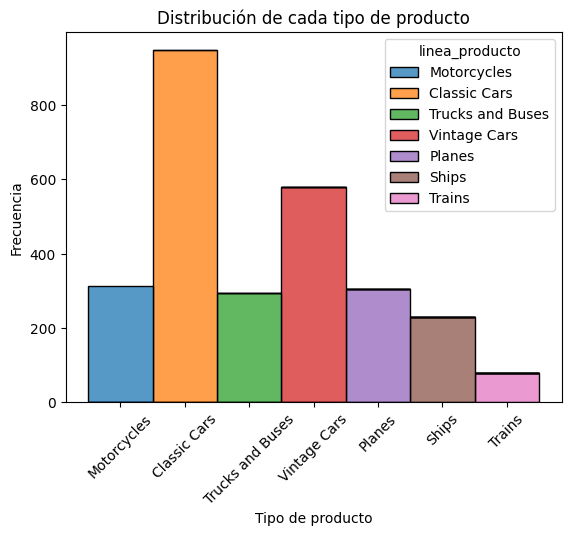

In [67]:
#Crear gráficos para visualizar la distribución de los datos, como histogramas y diagramas de caja.
import matplotlib.pyplot as plt
import seaborn as sns

#diagrama de cajas horizontal de precio_cada_pedido para Classic Cars
sns.boxplot(x=df[df['linea_producto'] == 'Classic Cars']['precio_cada_pedido'], color='green')
plt.title('Diagrama de cajas y bigotes del precio de Coches clásicos')
plt.xlabel('Precio')
plt.show()

#Histograma que muestra la distribución de cada linea_producto
sns.histplot(data=df, x='linea_producto', hue='linea_producto', multiple='stack')
plt.xticks(rotation=45)
plt.title('Distribución de cada tipo de producto')
plt.xlabel('Tipo de producto')
plt.ylabel('Frecuencia')
plt.show()

    c) Identifiquen y analicen las correlaciones entre variables.

Para ver la correlación entre las variables numéricas hay que calcular el coeficiente de relación de Pearson para ver la correlación lineal

In [69]:
corr = df.corr(method='pearson')
print(corr)

ValueError: could not convert string to float: '24/02/2018'

Los números toman valores entre -1 y 1. Si el valor es cercano a 1, significa que hay una correlación positiva fuerte, si es cercano a -1, significa que hay una correlación negativa fuerte y si es cercano a 0, significa que no hay correlación lineal.

Vamos a sustituir los números por cada tipo de correlación para entenderlo mejor. Para ello usamos un blucle for que sustituye los números por palabras.

In [70]:
for i in corr.columns:
    for j in corr.columns:
        if corr[i][j] == 1:
            corr[i][j] = 'PERFECTA (+)'
        elif corr[i][j] == -1:
            corr[i][j] = 'PERFECTA (-)'
        elif corr[i][j] < 1 and corr[i][j] >= 0.5:
            corr[i][j] = 'FUERTE (+)'
        elif corr[i][j] > -1 and corr[i][j] <= -0.5:
            corr[i][j] = 'FUERTE (-)'
        elif corr[i][j] < 0.5 and corr[i][j] >= 0.3:
            corr[i][j] = 'MODERADA (+)'
        elif corr[i][j] > -0.5 and corr[i][j] <= -0.3:
            corr[i][j] = 'MODERADA (-)'
        elif corr[i][j] < 0.3 and corr[i][j] >= 0.1:
            corr[i][j] = 'DEBIL (+)'
        elif corr[i][j] > -0.3 and corr[i][j] <= -0.1:
            corr[i][j] = 'DEBIL (-)'
        else:
            corr[i][j] = 'NULA'

print(corr)

NameError: name 'corr' is not defined

La recta de regresión es una línea que busca modelar la relación lineal entre una variable independiente y una variable dependiente.
Probemos a calcular la recta de regresión de dos variables con una correlación lineal fuerte.
Para ello vamos a utilizar la librería numpy y la función polyfit que se utiliza para calcular directamente la pendiente y la ordenada al origen de la recta de regresión.

In [ ]:
# Datos de precios Y ventas
PRICEEACH = df['precio_cada_pedido'].values
SALES = df['ventas'].values

Hallamos los valores de m(pendiente) y b(ordenada al origen) para la recta de regression y = mx + b  

In [ ]:
pendiente, ordenada_al_origen = np.polyfit(PRICEEACH, SALES, 1)

print(f"Pendiente: {pendiente}")
print(f"Ordenada_al_origen: {ordenada_al_origen}")

Pendiente: 29.873129160515646
Ordenada_al_origen: 434.4920130816187


Visualizar los datos y la recta de regresión para ver que efectivamente existe una correlación precio-ventas.

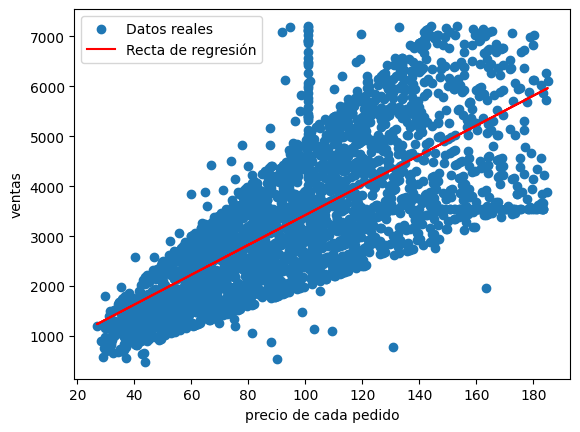

In [ ]:

plt.scatter(PRICEEACH, SALES, label='Datos reales')
plt.plot(PRICEEACH, pendiente * PRICEEACH + ordenada_al_origen, color='red', label='Recta de regresión')
plt.xlabel('precio de cada pedido')
plt.ylabel('ventas')
plt.legend()
plt.show()


4. Manipulación de datos usando condicionales y bucles:

a) Filtrar el dataset utilizando condiciones específicas.

b) Crear nuevas columnas aplicando funciones o cálculos basados en
valores de otras columnas.

c) Utilizar bucles para iterar sobre filas o columnas y realizar cálculos.

5. Manejo de excepciones:

a) Utilizar bloques try-except para manejar errores o excepciones al leer
o procesar el dataset.

In [3]:
import pandas as pd 
class InvalidDataError(Exception):
    pass

def process_dataset(df):
    df['columna']=df['columna'].apply(lambda x: x.lower())
    return df
#Bloque try-except
try:
    df=pd.read_csv('Auto_Sales_data.csv')
    #Comprobamos si faltan columnas
    columnas_requeridas=['numero_del_pedido', 'cantidad_de_pedidos','precio_cada_pedido','numero_linea_pedido','ventas','fecha_pedido','dias_desde_ultimo_pedido','status','linea_producto','precio_venta_sugerido','codigo_producto','nombre_cliente','telefono','direccion_linea1','ciudad','codigo_postal','pais','apellido_contacto','nombre_contacto','tamaño_acuerdo']
    columnas_q_faltan=[col for col in columnas_requeridas if col not in df.columns]
    if columnas_q_faltan:
        raise InvalidDataError(f"Faltan las siguientes columnas requeridas : ",{', '.join(columnas_q_faltan)})
    
    df_procesado=process_dataset(df)
#Varias excepciones
except pd.errors.EmptyDataError:
    print("El archivo CSV está vacío.")
except pd.errors.ParserError:
    print("Hubo un error al analizar el CSV")
except FileNotFoundError:
    print("No se encontró el archivo CSV.")
except InvalidDataError as e:
    print(e)
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")


('Faltan las siguientes columnas requeridas : ', {'numero_del_pedido, cantidad_de_pedidos, precio_cada_pedido, numero_linea_pedido, ventas, fecha_pedido, dias_desde_ultimo_pedido, status, linea_producto, precio_venta_sugerido, codigo_producto, nombre_cliente, telefono, direccion_linea1, ciudad, codigo_postal, pais, apellido_contacto, nombre_contacto, tamaño_acuerdo'})


b) Crear excepciones personalizadas para manejar situaciones
específicas del análisis.